In [18]:
import pandas as pd
df_togo = pd.read_csv("../data/togo-dapaong_qc.csv")

In [17]:
import os
os.listdir("../data")

['benin-malanville.csv',
 'benin_clean.csv',
 'sierraleone-bumbuna.csv',
 'sierraleone_clean.csv',
 'togo-dapaong_qc.csv',
 'togo_clean.csv']

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore



In [22]:
# Load Togo dataset
df_togo = pd.read_csv("../data/togo-dapaong_qc.csv")  # adjust the CSV name if needed

# Copy for cleaning
df_togo_clean = df_togo.copy()



In [26]:
# Summary statistics
print(df_togo_clean.describe())
print(df_togo_clean.isna().sum())
# List columns with >5% nulls
null_percent = df_togo_clean.isna().mean() * 100
print(null_percent[null_percent > 5])




                           Timestamp            GHI            DNI  \
count                         516349  516349.000000  516349.000000   
mean   2022-04-25 13:20:08.506455808     223.859675     147.975931   
min              2021-10-25 00:01:00     -12.700000       0.000000   
25%              2022-01-23 20:12:00      -2.200000       0.000000   
50%              2022-04-25 22:55:00       0.500000       0.000000   
75%              2022-07-25 23:21:00     423.200000     237.900000   
max              2022-10-25 00:00:00    1198.000000     904.100000   
std                              NaN     317.306277     247.683690   

                 DHI           ModA           ModB           Tamb  \
count  516349.000000  516349.000000  516349.000000  516349.000000   
mean      112.781249     219.380751     213.028150      27.727474   
min         0.000000       0.000000       0.000000      14.900000   
25%         0.000000       0.000000       0.000000      24.200000   
50%         1.500000    

In [28]:
# Outlier detection using Z-score
key_cols = ['GHI','DNI','DHI','ModA','ModB','WS','WSgust']
for col in key_cols:
    df_togo_clean[col+'_zscore'] = zscore(df_togo_clean[col].fillna(df_togo_clean[col].median()))
# Flag rows with |Z|>3
outliers = df_togo_clean[(df_togo_clean[[col+'_zscore' for col in key_cols]].abs() > 3).any(axis=1)]
print(f"Number of outliers detected: {len(outliers)}")



Number of outliers detected: 3349


In [29]:
# Impute missing values in key columns with median
for col in key_cols:
    df_togo_clean[col].fillna(df_togo_clean[col].median(), inplace=True)

# Save cleaned dataset (do NOT commit CSV)
df_togo_clean.to_csv("data/togo_clean.csv", index=False)



C:\Users\It's Blue\AppData\Local\Temp\ipykernel_59388\2097733894.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_togo_clean[col].fillna(df_togo_clean[col].median(), inplace=True)


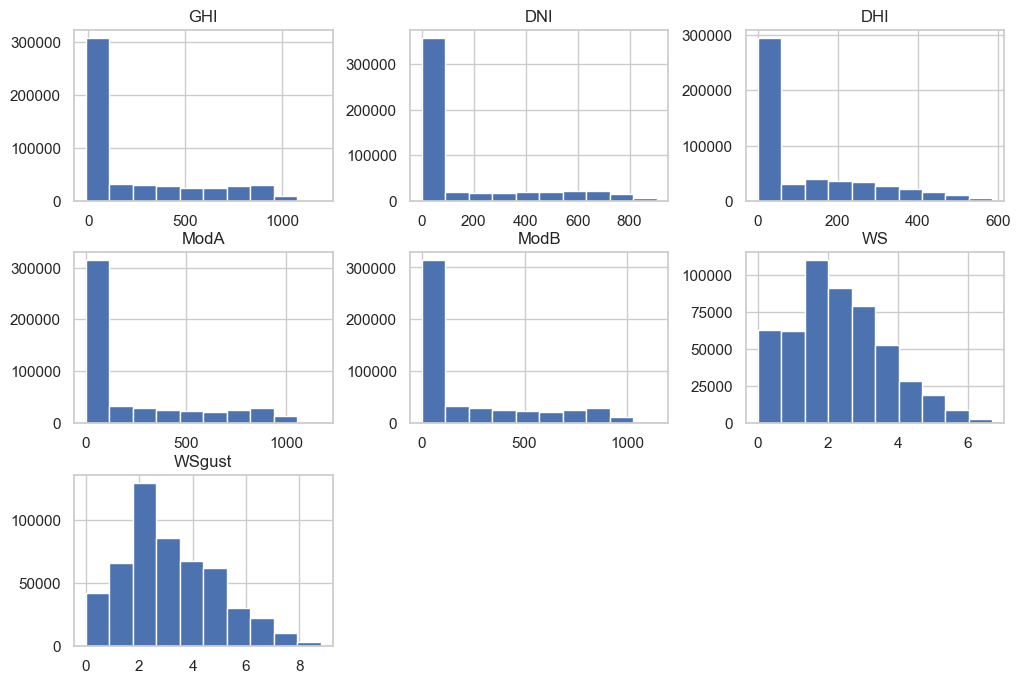

In [31]:
# Visualizations
# Histograms
df_togo_clean[key_cols].hist(figsize=(12,8))
plt.show()



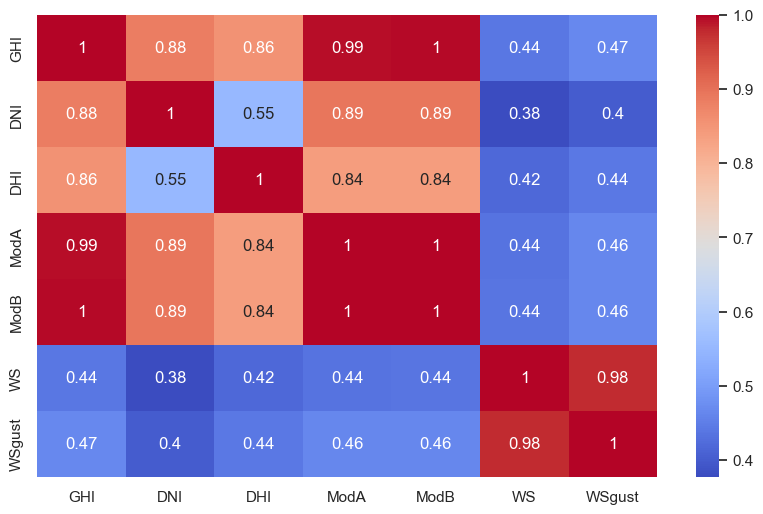

In [32]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_togo_clean[key_cols].corr(), annot=True, cmap='coolwarm')
plt.show()


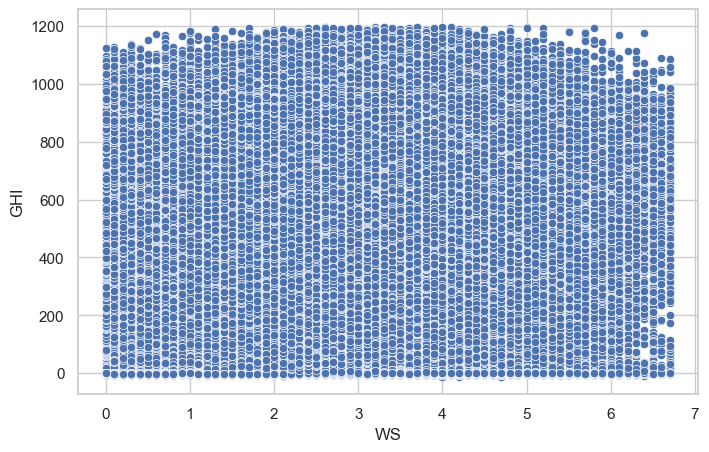

In [33]:

# Scatter plot example: WS vs GHI
plt.figure(figsize=(8,5))
sns.scatterplot(x='WS', y='GHI', data=df_togo_clean)
plt.show()




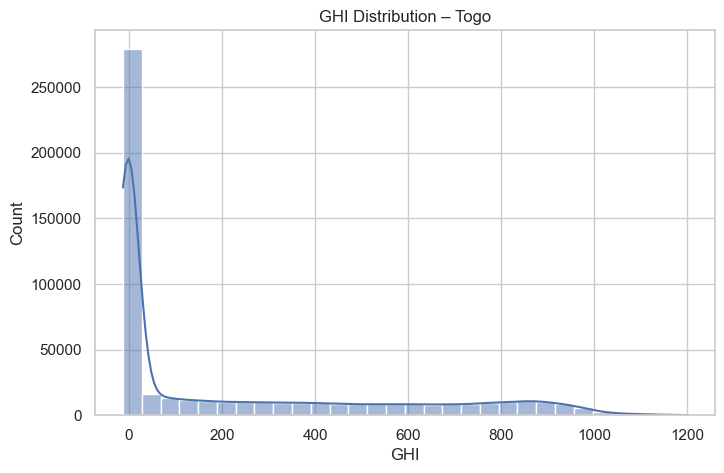

In [11]:
# Histogram for GHI
plt.figure(figsize=(8,5))
sns.histplot(df_togo_clean['GHI'], bins=30, kde=True)
plt.title("GHI Distribution – Togo")
plt.show()

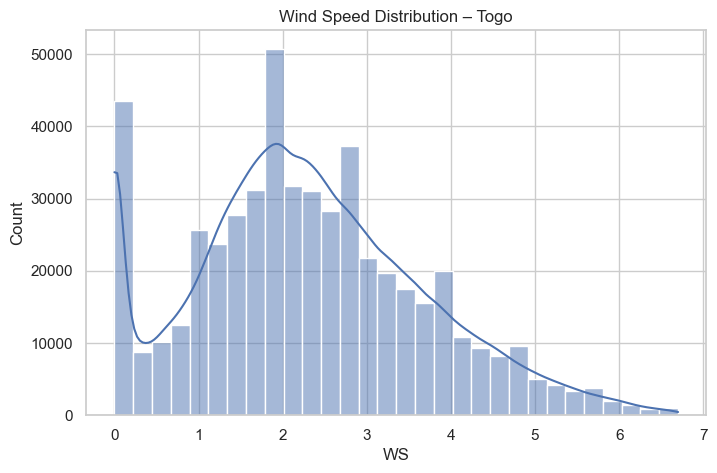

In [12]:

# Histogram for WS
plt.figure(figsize=(8,5))
sns.histplot(df_togo_clean['WS'], bins=30, kde=True)
plt.title("Wind Speed Distribution – Togo")
plt.show()

In [34]:
# Save cleaned Togo dataset (still in data/ folder, ignored by Git)
df_togo_clean.to_csv("data/togo_clean.csv", index=False)


In [14]:
# Save cleaned Togo dataset (still in data/ folder, ignored by Git)
df_togo_clean.to_csv("../data/togo_clean.csv", index=False)


In [15]:
# Save cleaned Togo dataset (still in data/ folder, ignored by Git)
df_togo_clean.to_csv("../notebooks/data/togo_clean.csv", index=False)
